In [1]:
import pandas as pd
import numpy as np
import missingno as msno
# Load the data into a DataFrame
df = pd.read_csv('Data/OriginationCombined.csv')
pf = pd.read_csv('Data/PerformanceCombined.csv')
pf['Year'] = ['20'+x for x in (pf['ln_sq_nbr'].apply(lambda x: x[2:4]))]

In [2]:
pf

,ln_sq_nbr,min_current_aupb,max_current_aupb,min_curr_ln_delin_status,max_curr_ln_delin_status,min_zero_bal_cd,max_zero_bal_cd,min_mi_recoveries,max_mi_recoveries,min_non_mi_recoveries,...,min_taxes_and_insur,max_taxes_and_insur,min_misc_expenses,max_misc_expenses,min_actual_loss_calc,max_actual_loss_calc,min_mod_cost,max_mod_cost,Year_Perf,Year
0,F105Q1000064,0.00,62000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
1,F105Q1000076,0.00,197000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
2,F105Q1000087,0.00,100000.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
3,F105Q1000130,0.00,334000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
4,F105Q1000195,0.00,125000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
5,F105Q1000217,0.00,145000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
6,F105Q1000227,61175.12,73000.00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3508.94,2005,2005
7,F105Q1000261,0.00,61000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
8,F105Q1000282,0.00,80000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
9,F105Q1000305,0.00,100000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005


In [3]:
df

,cred_scr,fst_paymnt_dte,fst_hmebyr_flg,maturty_dte,metro_stat_area,mort_insur_pctg,nbr_units,occu_status,orig_cmbnd_ln_to_value,orig_dbt_to_incm,...,proptype,zipcode,ln_sq_nbr,ln_purps,orig_ln_trm,nbr_brwrs,slr_name,srvcr_name,spr_confrm_flg,Year_Orig
0,722,200504,N,203503,0,0,1,P,80,48,...,MH,98200,F105Q1000064,P,360,2,Other sellers,Other servicers,N,2005
1,759,200503,N,203502,0,0,1,P,25,25,...,SF,20600,F105Q1000076,N,360,2,Other sellers,"PNCMTGESERVICES,INC",N,2005
2,591,200504,N,203503,39100,0,1,P,48,34,...,SF,12500,F105Q1000087,C,360,2,Other sellers,Other servicers,N,2005
3,792,200503,N,203502,39100,0,1,P,90,33,...,SF,12500,F105Q1000130,P,360,2,Other sellers,Other servicers,N,2005
4,725,200503,N,203502,48864,0,1,P,49,41,...,SF,19700,F105Q1000195,N,360,2,Other sellers,USBANKNA,N,2005
5,788,200503,N,203502,0,0,1,P,75,55,...,SF,78100,F105Q1000217,N,360,2,Other sellers,"WELLSFARGOBANK,NA",N,2005
6,691,200503,N,203502,0,35,1,P,97,48,...,SF,44600,F105Q1000227,P,360,2,Other sellers,Other servicers,N,2005
7,687,200503,N,203502,0,0,1,P,40,46,...,SF,34400,F105Q1000261,P,360,2,Other sellers,"WELLSFARGOBANK,NA",N,2005
8,784,200503,N,203502,0,0,1,P,35,30,...,SF,3200,F105Q1000282,C,360,2,Other sellers,Other servicers,N,2005
9,703,200503,N,203502,0,0,1,P,67,53,...,MH,97800,F105Q1000305,P,360,2,Other sellers,Other servicers,N,2005


In [4]:
#Merged the dataset
join_df = pd.DataFrame()
join_df = pd.merge(df, pf, on='ln_sq_nbr', how='inner')
join_df

,cred_scr,fst_paymnt_dte,fst_hmebyr_flg,maturty_dte,metro_stat_area,mort_insur_pctg,nbr_units,occu_status,orig_cmbnd_ln_to_value,orig_dbt_to_incm,...,min_taxes_and_insur,max_taxes_and_insur,min_misc_expenses,max_misc_expenses,min_actual_loss_calc,max_actual_loss_calc,min_mod_cost,max_mod_cost,Year_Perf,Year
0,722,200504,N,203503,0,0,1,P,80,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
1,759,200503,N,203502,0,0,1,P,25,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
2,591,200504,N,203503,39100,0,1,P,48,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
3,792,200503,N,203502,39100,0,1,P,90,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
4,725,200503,N,203502,48864,0,1,P,49,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
5,788,200503,N,203502,0,0,1,P,75,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
6,691,200503,N,203502,0,35,1,P,97,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3508.94,2005,2005
7,687,200503,N,203502,0,0,1,P,40,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
8,784,200503,N,203502,0,0,1,P,35,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005
9,703,200503,N,203502,0,0,1,P,67,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2005,2005


In [5]:
summ_df = pd.DataFrame()
grouped = df.groupby('Year_Orig')
summ_df = summ_df.append(grouped.aggregate(np.mean))
summ_df['loancount']=df['cred_scr'].groupby(df['Year_Orig']).count()
summ_df['year'] = summ_df.index
del summ_df['fst_paymnt_dte']
del summ_df['zipcode']
del summ_df['nbr_brwrs']
del summ_df['orig_ln_trm']
del summ_df['nbr_units']
del summ_df['metro_stat_area']
del summ_df['maturty_dte']
summ_df

,cred_scr,mort_insur_pctg,orig_cmbnd_ln_to_value,orig_dbt_to_incm,orig_upb,orig_ln_to_value,orig_intrst_rate,loancount,year
Year_Orig,,,,,,,,,
2005,728.499040,4.384360,71.216100,65.381640,170691.860000,69.568040,5.805862,50000,2005
2006,729.955000,3.476260,73.131020,57.585180,179592.580000,70.713940,6.406876,50000,2006
2007,728.461540,5.190540,74.538900,61.625620,183764.160000,72.103600,6.376952,50000,2007
2008,746.369047,4.268185,71.504450,57.184824,203978.499570,70.281966,6.057034,49999,2008
2009,762.336313,1.552389,66.853343,34.216716,213722.905542,65.449951,4.958592,50001,2009
2010,763.085820,1.776420,67.530100,32.019080,208388.820000,66.377100,4.637233,50000,2010
2011,764.000360,2.442760,68.477940,31.893660,217079.460000,67.420520,4.347664,50000,2011
2012,766.539360,3.066860,69.012900,30.950480,222671.620000,67.980500,3.609081,50000,2012
2013,758.535120,4.847660,72.036400,32.349620,217599.680000,71.241460,3.848064,50000,2013


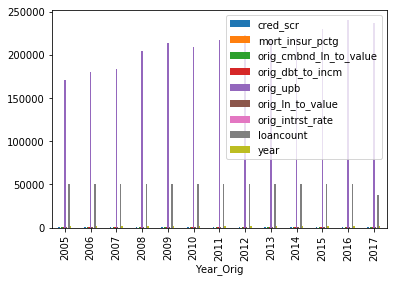

In [6]:
summ_df.plot.bar();

# 2007 Q1

In [7]:
origQ12007 = pd.read_table('historical_data1_Q12007/historical_data1_Q12007.txt', sep ='|')
origQ12007.columns = [
    u'cred_scr', u'fst_paymnt_dte', u'fst_hmebyr_flg', u'maturty_dte',
    u'metro_stat_area', u'mort_insur_pctg', u'nbr_units', u'occu_status', 
    u'orig_cmbnd_ln_to_value', u'orig_dbt_to_incm', u'orig_upb', u'orig_ln_to_value', u'orig_intrst_rate', 
    u'chnl', u'pre_pnl_mort_flg', u'prodtype', u'propstate',
    u'proptype', u'zipcode', u'ln_sq_nbr', u'ln_purps', u'orig_ln_trm', 
    u'nbr_brwrs', u'slr_name',  u'srvcr_name', u'spr_confrm_flg']

origQ12007.head()

,cred_scr,fst_paymnt_dte,fst_hmebyr_flg,maturty_dte,metro_stat_area,mort_insur_pctg,nbr_units,occu_status,orig_cmbnd_ln_to_value,orig_dbt_to_incm,...,propstate,proptype,zipcode,ln_sq_nbr,ln_purps,orig_ln_trm,nbr_brwrs,slr_name,srvcr_name,spr_confrm_flg
0,620,200705,9,203704,44140.0,0,1,P,73,32,...,MA,SF,1100.0,F107Q1000002,C,360,1,Other sellers,Other servicers,NaN
1,644,200703,Y,203702,35644.0,0,2,P,80,42,...,NJ,SF,7000.0,F107Q1000003,P,360,2,Other sellers,Other servicers,NaN
2,757,200703,N,203702,NaN,0,1,P,70,38,...,IN,SF,47500.0,F107Q1000004,C,360,1,Other sellers,Other servicers,NaN
3,800,200703,N,203702,NaN,0,1,P,43,37,...,ME,MH,4600.0,F107Q1000005,P,360,1,Other sellers,Other servicers,NaN
4,704,200703,N,203702,23844.0,0,1,P,87,41,...,IN,SF,46300.0,F107Q1000006,P,360,2,Other sellers,Other servicers,NaN


In [8]:
origQ12007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303803 entries, 0 to 303802
Data columns (total 26 columns):
cred_scr                  303803 non-null int64
fst_paymnt_dte            303803 non-null int64
fst_hmebyr_flg            303803 non-null object
maturty_dte               303803 non-null int64
metro_stat_area           253314 non-null float64
mort_insur_pctg           303803 non-null int64
nbr_units                 303803 non-null int64
occu_status               303803 non-null object
orig_cmbnd_ln_to_value    303803 non-null int64
orig_dbt_to_incm          303803 non-null int64
orig_upb                  303803 non-null int64
orig_ln_to_value          303803 non-null int64
orig_intrst_rate          303803 non-null float64
chnl                      303803 non-null object
pre_pnl_mort_flg          303440 non-null object
prodtype                  303803 non-null object
propstate                 303803 non-null object
proptype                  303803 non-null object
zipcode       

In [9]:
origQ12007.describe()

,cred_scr,fst_paymnt_dte,maturty_dte,metro_stat_area,mort_insur_pctg,nbr_units,orig_cmbnd_ln_to_value,orig_dbt_to_incm,orig_upb,orig_ln_to_value,orig_intrst_rate,zipcode,orig_ln_trm,nbr_brwrs,spr_confrm_flg
count,303803.000000,303803.000000,303803.000000,253314.000000,303803.000000,303803.000000,303803.000000,303803.000000,303803.000000,303803.000000,303803.000000,303802.000000,303803.000000,303803.000000,0.0
mean,729.224544,200704.475111,203527.195581,30099.895750,3.466562,1.030293,73.312894,54.879106,184325.233786,70.419203,6.206375,51000.929882,338.853843,1.585409,NaN
std,242.325819,7.635928,470.535701,11421.247902,9.031902,0.281689,20.869524,132.668973,96489.279154,19.585349,0.360681,28866.539245,56.453765,2.157455,NaN
min,300.000000,200701.000000,201202.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,3.500000,600.000000,60.000000,1.000000,NaN
25%,681.000000,200703.000000,203702.000000,19124.000000,0.000000,1.000000,63.000000,28.000000,110000.000000,62.000000,6.000000,28600.000000,360.000000,1.000000,NaN
50%,728.000000,200704.000000,203703.000000,31140.000000,0.000000,1.000000,79.000000,37.000000,164000.000000,76.000000,6.250000,48200.000000,360.000000,2.000000,NaN
75%,772.000000,200705.000000,203704.000000,39580.000000,0.000000,1.000000,87.000000,46.000000,243000.000000,80.000000,6.375000,77400.000000,360.000000,2.000000,NaN
max,9999.000000,201605.000000,205407.000000,49740.000000,40.000000,99.000000,999.000000,999.000000,802000.000000,999.000000,9.250000,99900.000000,569.000000,99.000000,NaN


In [10]:
origQ12007.shape

(303803, 26)

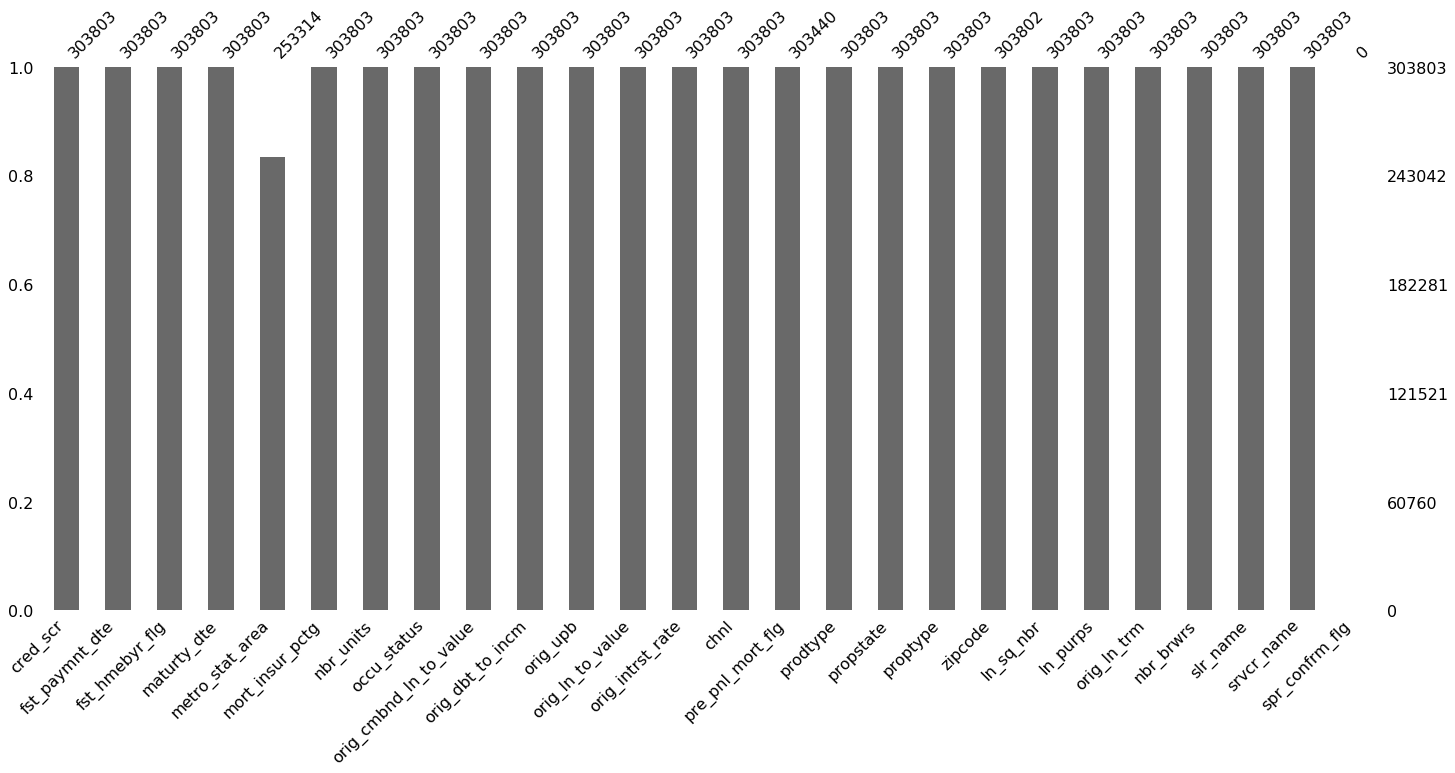

In [11]:
msno.bar(origQ12007)

In [12]:
perfQ12007 = pd.read_table('historical_data1_Q12007/historical_data1_time_Q12007.txt', sep ='|')
perfQ12007.columns = [
    u'ln_sq_nbr', u'mon_rpt_prd', u'current_aupb', u'curr_ln_delin_status',
    u'loan_age', u'remng_mon_to_leg_matur', u'repurch_flag', u'mod_flag',
    u'zero_bal_cd', u'zero_bal_eff_dt', u'current_int_rte',
    u'current_dupb', u'lst_pd_inst_duedt', u'mi_recoveries',
    u'net_sale_proceeds', u'non_mi_recoveries', u'expenses', u'legal_costs',
    u'maint_pres_costs', u'taxes_and_insur', u'misc_expenses',
    u'actual_loss_calc', u'mod_cost', u'stp_mod_flg', u'def_pymnt_mod', u'est_loan_to_vlv']
    
perfQ12007.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ln_sq_nbr,mon_rpt_prd,current_aupb,curr_ln_delin_status,loan_age,remng_mon_to_leg_matur,repurch_flag,mod_flag,zero_bal_cd,zero_bal_eff_dt,...,expenses,legal_costs,maint_pres_costs,taxes_and_insur,misc_expenses,actual_loss_calc,mod_cost,stp_mod_flg,def_pymnt_mod,est_loan_to_vlv
0,F107Q1000001,201703,50479.27,0,119,241,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F107Q1000001,201704,50373.98,0,120,240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,61.1
2,F107Q1000001,201705,50268.14,0,121,239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,60.3
3,F107Q1000001,201706,50161.75,0,122,238,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,53.6
4,F107Q1000001,201707,50054.81,0,123,237,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,52.2


In [13]:
perfQ12007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122891 entries, 0 to 18122890
Data columns (total 26 columns):
ln_sq_nbr                 object
mon_rpt_prd               int64
current_aupb              float64
curr_ln_delin_status      object
loan_age                  int64
remng_mon_to_leg_matur    int64
repurch_flag              object
mod_flag                  object
zero_bal_cd               float64
zero_bal_eff_dt           float64
current_int_rte           float64
current_dupb              float64
lst_pd_inst_duedt         float64
mi_recoveries             float64
net_sale_proceeds         object
non_mi_recoveries         float64
expenses                  float64
legal_costs               float64
maint_pres_costs          float64
taxes_and_insur           float64
misc_expenses             float64
actual_loss_calc          float64
mod_cost                  float64
stp_mod_flg               object
def_pymnt_mod             object
est_loan_to_vlv           float64
dtypes: float6

In [14]:
perfQ12007.describe()

,mon_rpt_prd,current_aupb,loan_age,remng_mon_to_leg_matur,zero_bal_cd,zero_bal_eff_dt,current_int_rte,current_dupb,lst_pd_inst_duedt,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_and_insur,misc_expenses,actual_loss_calc,mod_cost,est_loan_to_vlv
count,1.812289e+07,1.812289e+07,1.812289e+07,1.812289e+07,272783.000000,272783.000000,1.812289e+07,1.812289e+07,36392.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,303780.000000,311569.000000
mean,2.010252e+05,1.622240e+05,4.159446e+01,3.043723e+02,1.661599,201110.759505,6.069708e+00,7.410383e+02,201122.581282,8953.110579,7659.764684,-14989.074518,-3233.050219,-4638.942886,-6445.180524,-671.928801,-85110.926293,1596.771510,59.795844
std,2.691621e+02,9.449071e+04,3.219047e+01,7.036101e+01,2.269397,244.809076,7.561182e-01,7.905164e+03,295.543985,21343.620120,31608.923604,15887.692352,2678.955967,7439.217250,10016.964488,3728.182482,66224.828535,9111.623532,26.550478
min,2.007020e+05,0.000000e+00,0.000000e+00,-1.300000e+01,1.000000,200702.000000,0.000000e+00,0.000000e+00,200701.000000,0.000000,-115852.000000,-283171.000000,-100890.000000,-89092.000000,-146219.000000,-206014.000000,-661816.000000,-32870.350000,0.100000
25%,2.008070e+05,9.230511e+04,1.600000e+01,2.870000e+02,1.000000,200906.000000,5.875000e+00,0.000000e+00,200906.000000,0.000000,227.000000,-20131.000000,-4437.000000,-5633.000000,-8031.000000,-822.000000,-121956.000000,0.000000,42.800000
50%,2.010010e+05,1.431178e+05,3.400000e+01,3.230000e+02,1.000000,201102.000000,6.125000e+00,0.000000e+00,201010.000000,0.000000,1048.000000,-11066.000000,-2968.000000,-1761.000000,-3745.000000,-365.000000,-74938.000000,0.000000,60.400000
75%,2.012040e+05,2.167520e+05,6.100000e+01,3.450000e+02,1.000000,201302.000000,6.375000e+00,0.000000e+00,201212.000000,0.000000,2374.000000,-5159.000000,-1624.000000,-80.000000,-1433.000000,-220.000000,-36134.000000,0.000000,75.600000
max,2.018030e+05,8.020000e+05,1.330000e+02,5.690000e+02,15.000000,201803.000000,5.375000e+01,3.362461e+05,201801.000000,200497.000000,515249.000000,332862.000000,0.000000,9780.000000,343417.000000,225740.000000,250750.000000,218849.240000,554.000000


In [15]:
perfQ12007.shape

(18122891, 26)

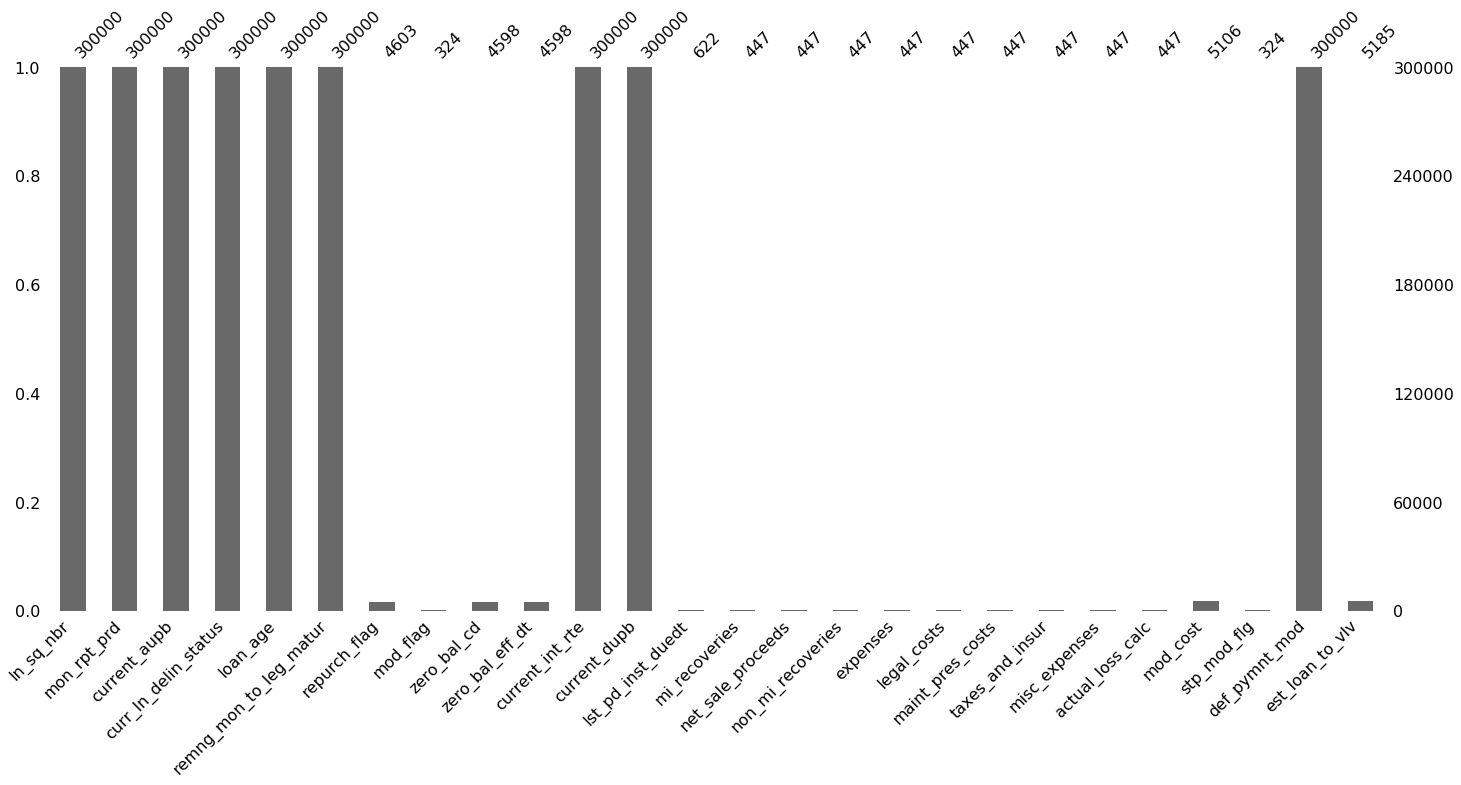

In [16]:
msno.bar(perfQ12007.sample(300000))

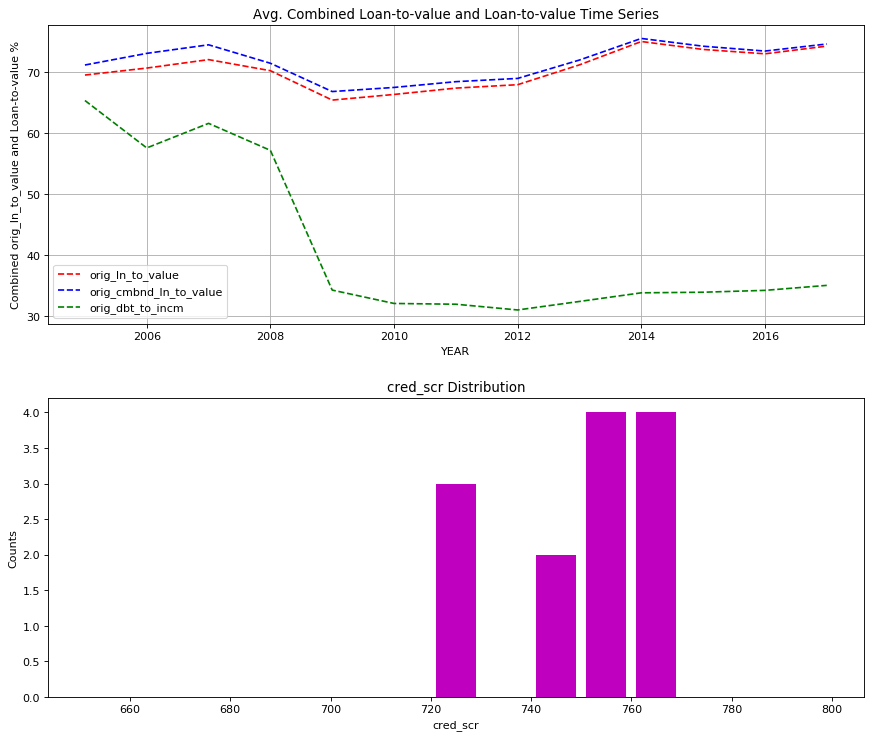

D:\Anaconda\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


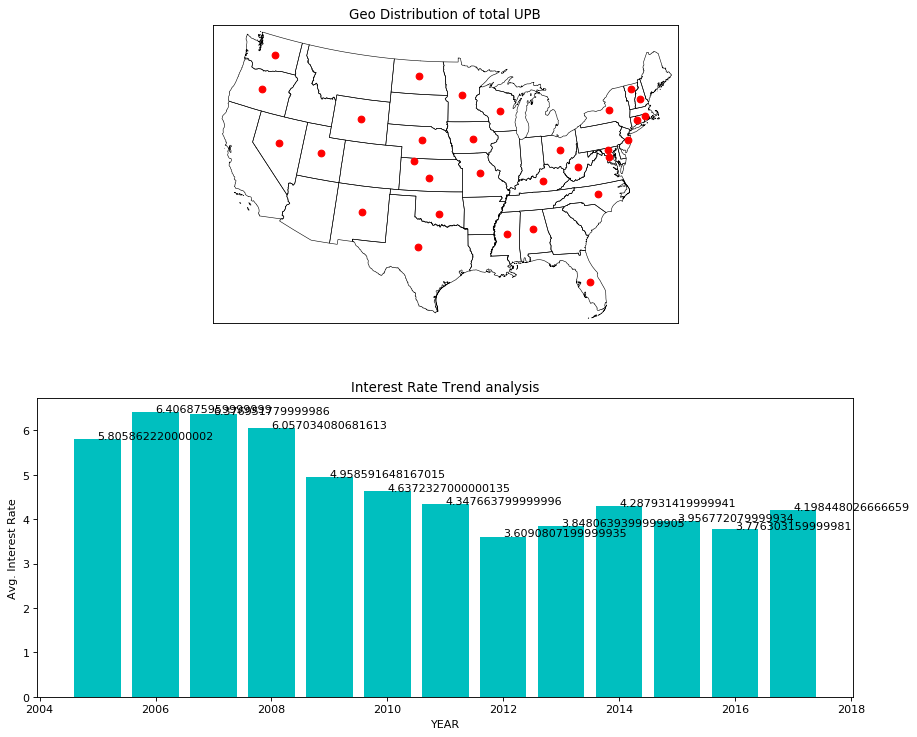

In [11]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math


def plot_time_trends_1():
    orig_cmbnd_ln_to_value=summ_df['orig_cmbnd_ln_to_value']
    orig_ln_to_value=summ_df['orig_ln_to_value']
    Year_Orig=df['Year_Orig'].drop_duplicates()
    cred_scr=summ_df['cred_scr']
    orig_dbt_to_incm=summ_df['orig_dbt_to_incm']

    plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='b')

    ax1=plt.subplot(211)
    plt.plot(Year_Orig,orig_ln_to_value,'r--',Year_Orig,orig_cmbnd_ln_to_value,'b--',Year_Orig,orig_dbt_to_incm,'g--')
    plt.xlabel('YEAR')
    plt.ylabel('Combined orig_ln_to_value and Loan-to-value %')
    plt.legend(['orig_ln_to_value','orig_cmbnd_ln_to_value','orig_dbt_to_incm'])
    plt.grid(True)
    
    plt.title('Avg. Combined Loan-to-value and Loan-to-value Time Series')

    ax2=plt.subplot(212)
    bins=[650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800]
    plt.hist(cred_scr, bins=bins, histtype='bar', rwidth=0.8 ,color='m')
    plt.xlabel('cred_scr')
    plt.ylabel('Counts')
    plt.title('cred_scr Distribution')
        
    ax2.margins(0.05)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    
def plot_time_trends_2():
    orig_intrst_rate=summ_df['orig_intrst_rate']
    year=df['Year_Orig'].drop_duplicates()

    plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='b')

    ax3=plt.subplot(211)
    
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile('st99_d00', name='states', drawbounds=True)
    
    plt.title('Geo Distribution of total UPB')
    geolocator = Nominatim()
    cities = df['ln_sq_nbr'].groupby(df['propstate']).count()
    cities = cities.keys()
    for city in cities:
        try:
            loc = geolocator.geocode(city)
            x, y = map(loc.longitude, loc.latitude)
            map.plot(x,y,marker='o',color='Red')
        except:
            print('')

    ax4=plt.subplot(212)
    plt.bar(year,orig_intrst_rate,color='c')
    plt.xlabel('YEAR')
    plt.ylabel('Avg. Interest Rate')
    plt.title('Interest Rate Trend analysis')
    for a,b in zip(year, orig_intrst_rate): 
        plt.text(a, b, str(b))
        
    ax4.margins(0.05)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()    
    
    
plot_time_trends_1()
plot_time_trends_2()

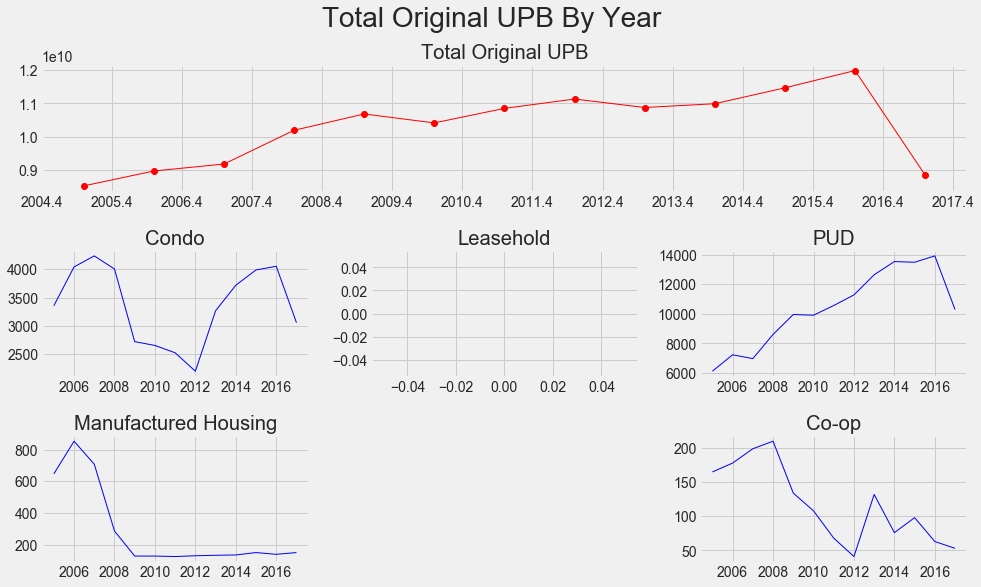

In [12]:
#Total OriginalUPB Group ByYear 
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

sns.set_style("darkgrid")


Condo = df[df['proptype'] == "CO"]
Leasehold = df[df['proptype'] == "LH"]
PUD = df[df['proptype'] == "PU"]
ManufHousing = df[df['proptype'] == "MH"]
SimpleFee = df[df['proptype'] == "SF"]
Coop = df[df['proptype'] == "CP"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(df['orig_upb'].groupby(df['Year_Orig']).sum(), 'ro-',linewidth=1)
    ax1.set_title ('Total Original UPB')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(Condo['orig_upb'].groupby(df['Year_Orig']).count(), 'b-',linewidth=1)
    ax2.set_title ('Condo')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(Leasehold['orig_upb'].groupby(df['Year_Orig']).count(), 'b-',linewidth=1)
    ax3.set_title ('Leasehold')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(PUD['orig_upb'].groupby(df['Year_Orig']).count(), 'b-',linewidth=1)
    ax4.set_title ('PUD')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(ManufHousing['orig_upb'].groupby(df['Year_Orig']).count(), 'b-',linewidth=1)
    ax5.set_title ('Manufactured Housing')
    
    ax6 = plt.subplot2grid((3,3), (2, 2))
    ax6.plot(SimpleFee['orig_upb'].groupby(df['Year_Orig']).count(), 'b-',linewidth=1)
    ax6.set_title ('Simple Fee')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(Coop['orig_upb'].groupby(df['Year_Orig']).count(), 'b-',linewidth=1)
    ax7.set_title ('Co-op')
  
    pylab.gcf().text(0.5, 1.03, 
                    'Total Original UPB By Year',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()

In [13]:
df.groupby('prodtype').describe()

Year_Orig                                                         \
             count         mean       std     min     25%     50%     75%   
prodtype                                                                    
FRM       637500.0  2010.882355  3.681684  2005.0  2008.0  2011.0  2014.0   

                  cred_scr               ...     orig_upb             \
             max     count        mean   ...          75%        max   
prodtype                                 ...                           
FRM       2017.0  637500.0  750.113663   ...     280000.0  1144000.0   

           zipcode                                                            \
             count          mean         std  min      25%      50%      75%   
prodtype                                                                       
FRM       637500.0  53446.574431  29876.2331  0.0  29000.0  53100.0  80600.0   

                   
              max  
prodtype           
FRM       99900.0  

[1 rows x 120 columns]

In [14]:
df.groupby('proptype').describe()

Year_Orig                                                         \
             count         mean       std     min     25%     50%     75%   
proptype                                                                    
CO         43808.0  2010.932569  3.889762  2005.0  2007.0  2011.0  2015.0   
CP          1525.0  2009.607213  3.572801  2005.0  2007.0  2009.0  2013.0   
MH          3712.0  2008.514817  3.647984  2005.0  2006.0  2007.0  2011.0   
PU        134488.0  2011.789803  3.527351  2005.0  2009.0  2012.0  2015.0   
SF        453967.0  2010.632319  3.657753  2005.0  2007.0  2011.0  2014.0   

                  cred_scr               ...     orig_upb             \
             max     count        mean   ...          75%        max   
proptype                                 ...                           
CO        2017.0   43808.0  759.456720   ...     272000.0   748000.0   
CP        2017.0    1525.0  750.371803   ...     277000.0   729000.0   
MH        2017.0    3712.0  740.939116   ...     128000.0   417000.0   
PU        2017.0  134488.0  755.988832   ...     309000.0   794000.0   
SF        2017.0  453967.0  747.545683   ...     270000.0  1144000.0   

           zipcode                                                        \
             count          mean           std     min      25%      50%   
proptype                                                                   
CO         43808.0  51592.065376  32462.807136   600.0  22075.0  51300.0   
CP          1525.0  11347.147541   5631.594419  6600.0  10000.0  11000.0   
MH          3712.0  62710.560345  27737.222806  1500.0  34600.0  62400.0   
PU        134488.0  58118.358515  27206.095133   600.0  30500.0  63100.0   
SF        453967.0  52307.190170  30188.355484     0.0  28000.0  51200.0   

                            
              75%      max  
proptype                    
CO        89000.0  99900.0  
CP        11300.0  98100.0  
MH        89000.0  99600.0  
PU        80900.0  99800.0  
SF        80300.0  99900.0  

[5 rows x 120 columns]

In [15]:
loanpurp = pd.DataFrame()
loanpurp = df.groupby(['chnl', 'ln_purps']).size().sort_values()
loan = loanpurp.unstack()
loan

ln_purps,C,N,P
chnl,,,
B,13722,21295,19896
C,35020,50316,77259
R,99345,103607,120613
T,34943,19481,42003


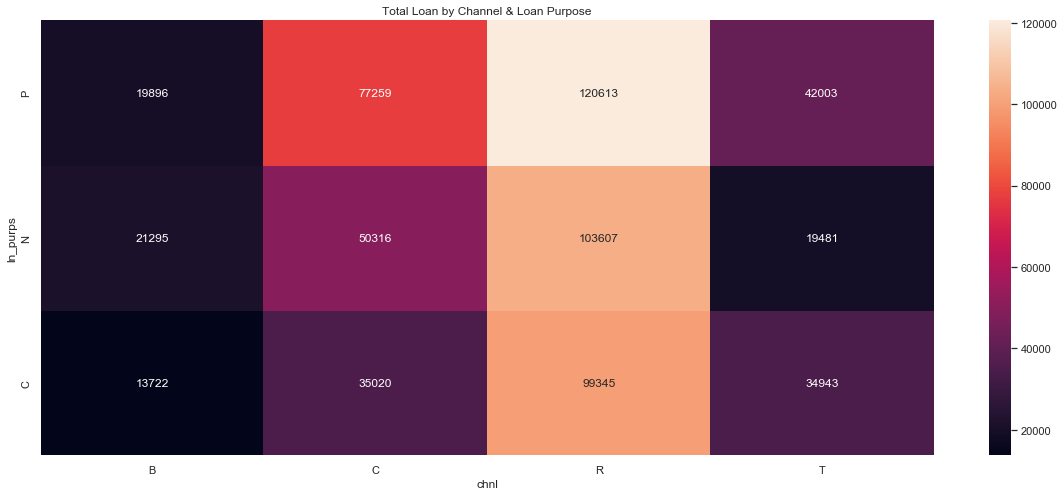

In [16]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(20, 8))
plt.title('Total Loan by Channel & Loan Purpose')
ax =sns.heatmap(loan.T,mask= loan.T.isnull(),annot=True,fmt='g');
ax.invert_yaxis()

In [17]:
delqstatis = pd.DataFrame()
delqstatis = pf['max_curr_ln_delin_status'].groupby(pf['Year']).value_counts()
delqstatis.fillna(0,inplace=True)
user= delqstatis.unstack().fillna(0).astype(int)
user

max_curr_ln_delin_status,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,103.0,104.0,107.0,109.0,110.0,111.0,114.0,120.0,122.0,999.0
Year,,,,,,,,,,,,,,,,,,,,,
2005,38782,5038,956,494,384,342,264,241,198,175,...,2,0,1,0,0,0,0,0,1,1572
2006,37537,4507,959,468,426,377,335,299,244,239,...,0,0,0,0,0,1,1,1,0,2335
2007,36316,4578,1115,533,432,485,417,337,273,285,...,0,0,0,1,1,0,0,0,0,2577
2008,40940,3742,785,369,280,298,248,217,177,179,...,0,1,0,0,0,0,0,0,0,1208
2009,46148,2639,327,146,78,78,51,40,38,42,...,0,0,0,0,0,0,0,0,0,161
2010,46828,2312,255,111,64,63,42,36,25,21,...,0,0,0,0,0,0,0,0,0,79
2011,47219,2101,229,103,55,57,37,27,12,11,...,0,0,0,0,0,0,0,0,0,38
2012,47682,1896,193,65,32,22,22,7,12,7,...,0,0,0,0,0,0,0,0,0,18
2013,47241,2240,199,70,51,50,26,15,9,11,...,0,0,0,0,0,0,0,0,0,20


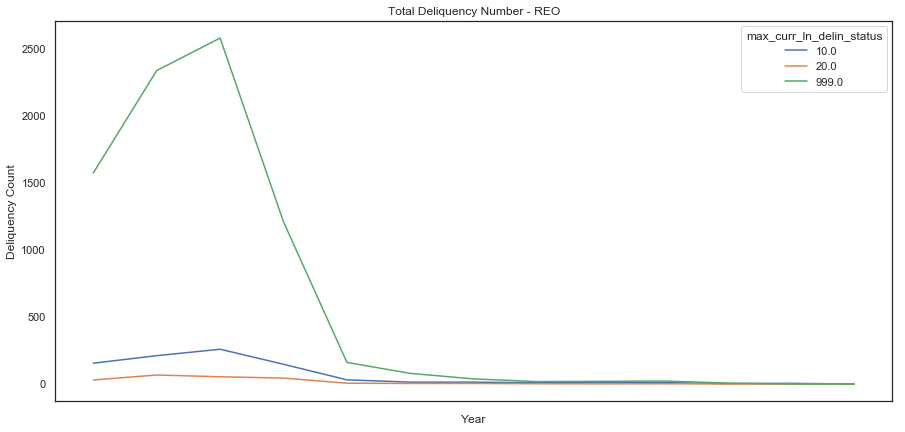

In [18]:
user[[10, 20,999]].plot(figsize=(15,7))
plt.title('Total Deliquency Number - REO')
plt.ylabel('Deliquency Count')
plt.show()

In [19]:
sellerRank = pd.DataFrame()
sellerRank['rank'] = df['ln_sq_nbr'].groupby(df['slr_name']).count().sort_values(ascending = False)
sellerRank

,rank
slr_name,
Other sellers,167920
"WELLSFARGOBANK,NA",119810
USBANKNA,47948
"BANKOFAMERICA,NA",38651
BRANCHBANKING&TRUSTC,26175
CHASEHOMEFINANCELLC,24781
"JPMORGANCHASEBANK,NA",21090
COUNTRYWIDE,20546
WASHINGTONMUTUALBANK,13820


<Figure size 432x288 with 0 Axes>

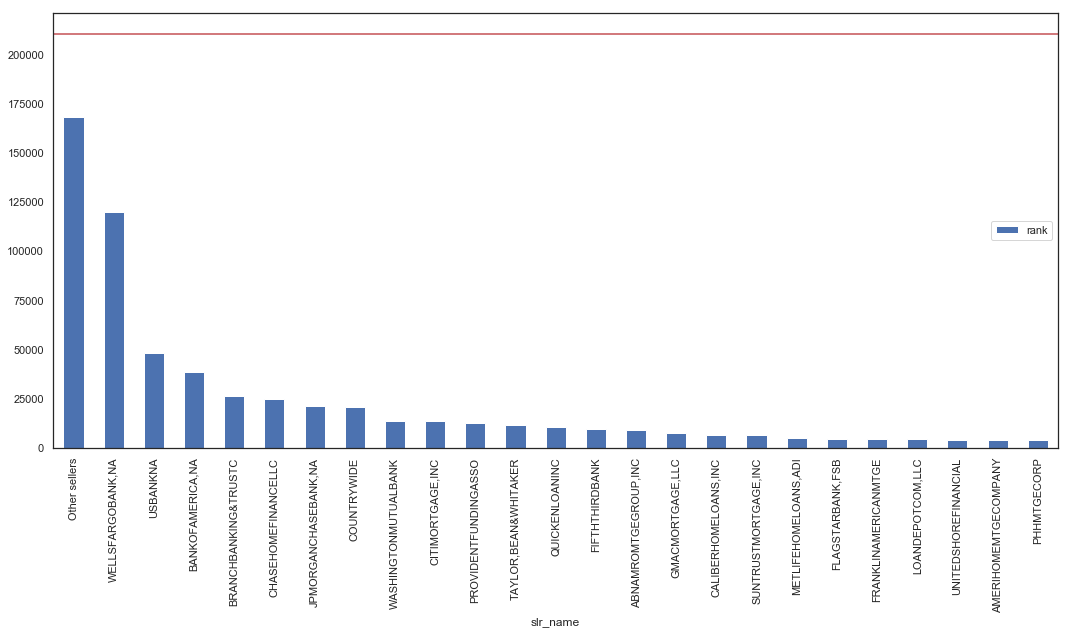

In [20]:
%matplotlib inline 
    
import matplotlib.pyplot as plt
plt.figure() 
sellerRank.head(n=25).plot(figsize=(18,8), kind='bar')
plt.axhline(df.orig_upb.mean(), color='r')

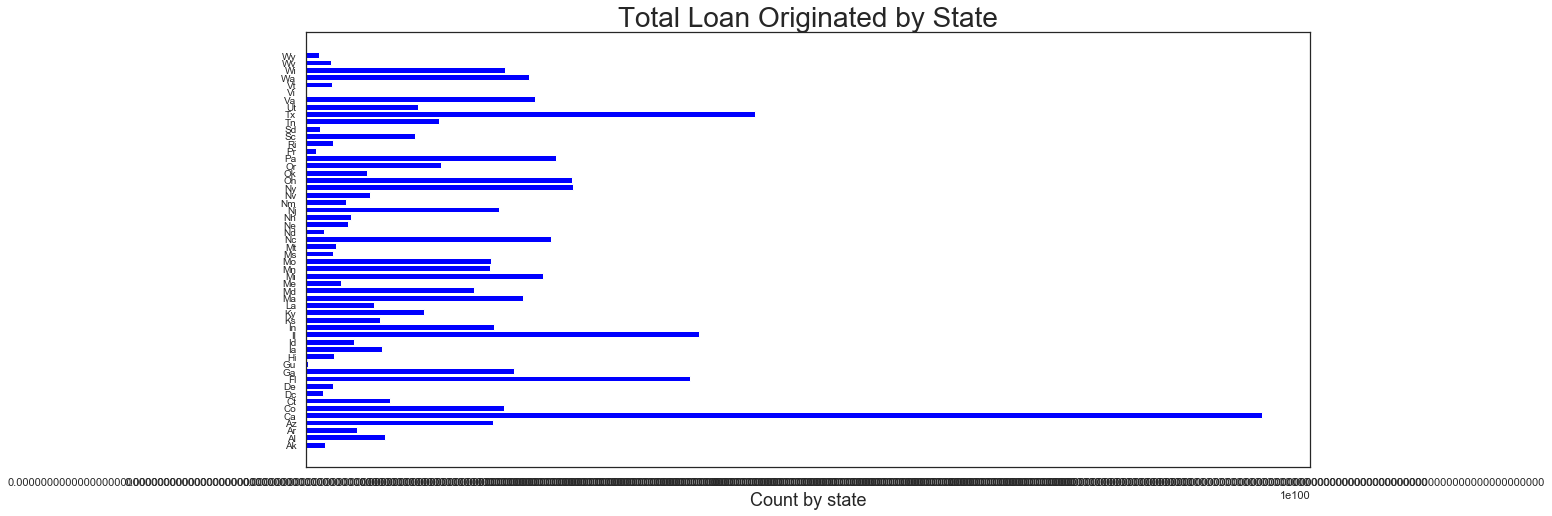

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(num=None, figsize=(18, 8), facecolor='w', edgecolor='b')
loan_rating = df['ln_sq_nbr'].groupby(df['propstate']).count()
x_pos = np.arange(len(loan_rating[0:55].value_counts()))
plt.barh(x_pos, loan_rating[0:55].get_values(), color = 'blue')
plt.yticks(x_pos, map(lambda x:x.title(),loan_rating[0:55].keys()), fontsize = 10)
plt.xlabel('Count by state', fontsize = 18)
plt.title('Total Loan Originated by State', fontsize = 28)
plt.ticklabel_format(style='sci',axis='x',scilimits=(100,100))
plt.show()